In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
from llm_toolkit.logical_reasoning_utils import *

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py


In [6]:
model_name = "Mistral-7B-v0.3-Chinese-Chat"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [7]:
import pandas as pd

df = pd.read_csv(result_csv)
df["shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf"] = df[
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-00"
]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   text                                                                       3000 non-null   object
 1   label                                                                      3000 non-null   object
 2   title                                                                      3000 non-null   object
 3   puzzle                                                                     3000 non-null   object
 4   truth                                                                      3000 non-null   object
 5   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf                 3000 non-null   object
 6   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-105_torch.f

In [8]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-105_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-140_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-175_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-210_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-245_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-280_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-315_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-35_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-350_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70_torch.float16_lf',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-00',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-10']

In [9]:
perf_df = get_metrics_df(df)
perf_df

columns: ['shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf', 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-105_torch.float16_lf', 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-140_torch.float16_lf', 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-175_torch.float16_lf', 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-210_torch.float16_lf', 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-245_torch.float16_lf', 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-280_torch.float16_lf', 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-315_torch.float16_lf', 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-35_torch.float16_lf', 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-350_torch.float16_lf', 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70_torch.float16_lf']


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:453: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                         model  \
0     0.0  Mistral-7B-v0.3-Chinese-Chat   
1     0.2  Mistral-7B-v0.3-Chinese-Chat   
2     0.4  Mistral-7B-v0.3-Chinese-Chat   
3     0.6  Mistral-7B-v0.3-Chinese-Chat   
4     0.8  Mistral-7B-v0.3-Chinese-Chat   
5     1.0  Mistral-7B-v0.3-Chinese-Chat   
6     1.2  Mistral-7B-v0.3-Chinese-Chat   
7     1.4  Mistral-7B-v0.3-Chinese-Chat   
8     1.6  Mistral-7B-v0.3-Chinese-Chat   
9     1.8  Mistral-7B-v0.3-Chinese-Chat   
10    2.0  Mistral-7B-v0.3-Chinese-Chat   

                                                  run  accuracy  precision  \
0   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torc...  0.694667   0.701136   
1   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.659667   0.792340   
2   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.714667   0.786134   
3   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.732667   0.787687   
4   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.701667   0.790312   
5   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.750000   0.788587   
6   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.715667   0.784611   
7   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.691667   0.786426   
8   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.702000   0.793273   
9   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.697667   0.788944   
10  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/chec...  0.742000   0.789829   

      recall        f1  ratio_valid_classifications  
0   0.694667  0.663408                     0.011667  
1   0.659667  0.706754                     1.000000  
2   0.714667  0.740468                     1.000000  
3   0.732667  0.747187                     1.000000  
4   0.701667  0.734871                     1.000000  
5   0.750000  0.764823                     1.000000  
6   0.715667  0.741004                     1.000000  
7   0.691667  0.725750                     1.000000  
8   0.702000  0.734271                     1.000000  
9   0.697667  0.730800                     1.000000  
10  0.742000  0.753668                     1.000000

0.0: shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf
0.2: shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-105_torch.float16_lf
0.4: shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-140_torch.float16_lf
0.6: shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-175_torch.float16_lf
0.8: shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-210_torch.float16_lf
1.0: shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-245_torch.float16_lf
1.2: shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-280_torch.float16_lf
1.4: shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-315_torch.float16_lf
1.6: shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-35_torch.float16_lf
1.8: shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-350_torch.float16_lf
2.0: shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70_torch.float16_lf


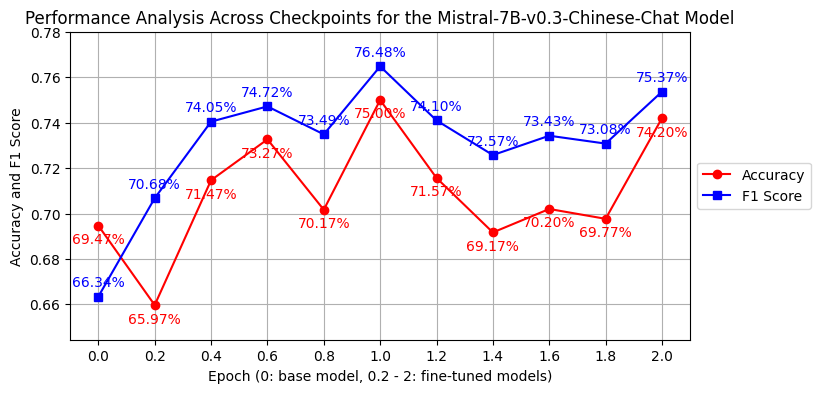

In [10]:
plot_metrics(perf_df, model_name)

In [11]:
perf_df.to_csv(metrics_csv, index=False)

In [12]:
perf_df_shots = get_metrics_df(df, variant="shots")
perf_df_shots

columns: ['shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-00', 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-10']


/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:453: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


shots                         model  \
0     0  Mistral-7B-v0.3-Chinese-Chat   
1    10  Mistral-7B-v0.3-Chinese-Chat   

                                                 run  accuracy  precision  \
0  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shot...  0.694667   0.701136   
1  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shot...  0.603667   0.733491   

     recall        f1  ratio_valid_classifications  
0  0.694667  0.663408                     0.011667  
1  0.603667  0.649319                     0.106333

0: shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-00
10: shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-10


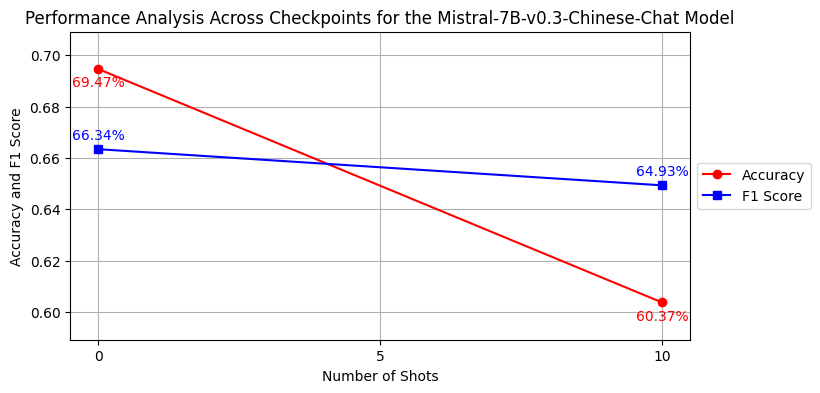

In [13]:
plot_metrics(perf_df_shots, model_name, variant="shots")

In [14]:
perf_df_shots.to_csv(
    metrics_csv.replace("metrics.csv", "shots_metrics.csv"), index=False
)

In [15]:
extract_answer("不是。", debug=True)

--------
step 1: 不是。
--------
step 2: 不是。
--------
step 3: 不是。
--------
step 4: 不是
--------
step 5: 不是


'不是'

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf
不是。                                                        2204
是。                                                          711
不重要。                                                         43
不重要                                                          34
甄昭容希望与海龟做交易。                                                  1
不是。背包的主人是一位好奇的学生，他滑入湖中后遭遇了不幸。"它"在这里指的是湖龟，背包的主人是有意去寻找它的。       1
不是。湖龟因为被惊吓而潜入水中，并没有立即死亡。它能够生存在水中，直到找到了安全的地方或者被其他因素影响。         1
不是。背包的主人是为了带走他发现的湖龟，但由于湖龟是一只保护动物，他无法私自将其带回去。                  1
甄郝是中毒而亡。                                                      1
帽子是小男孩带来的，他从城市回到村子时，带着爷爷的帽子回到了湖边。                             1
小男孩是村子里的一个居民，他与爷爷在湖边生活，后来随父母去城市生活，但每年夏天都会回到村子。                1
是                                                             1
Name: count, dtype: int64


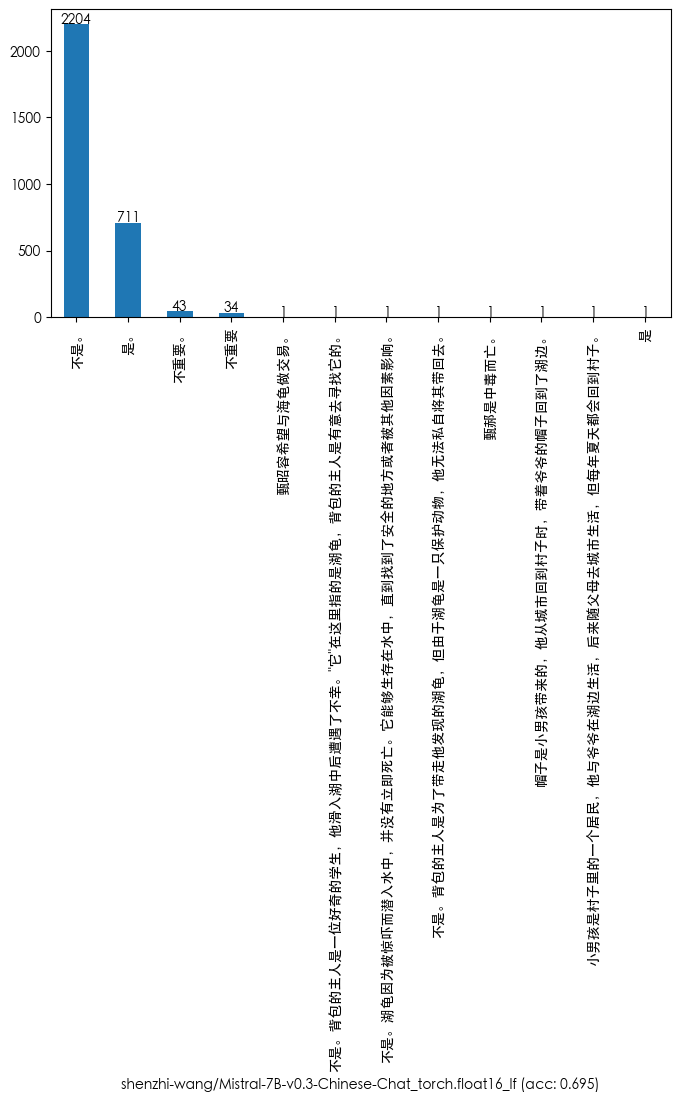

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-105_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-105_torch.float16_lf
不是      1177
是       1034
不重要      734
回答正确      36
问法错误      19
Name: count, dtype: int64


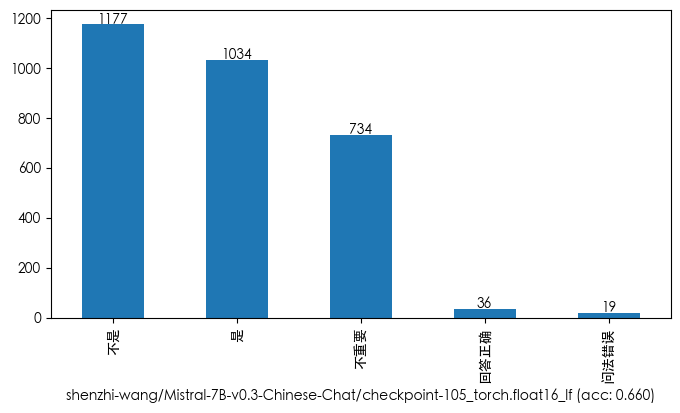

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-140_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-140_torch.float16_lf
不是      1483
是        975
不重要      459
问法错误      42
回答正确      41
Name: count, dtype: int64


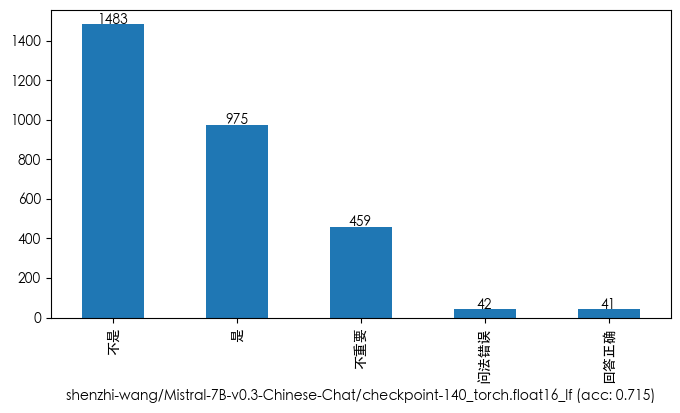

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-175_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-175_torch.float16_lf
不是      1646
是        917
不重要      386
回答正确      36
问法错误      15
Name: count, dtype: int64


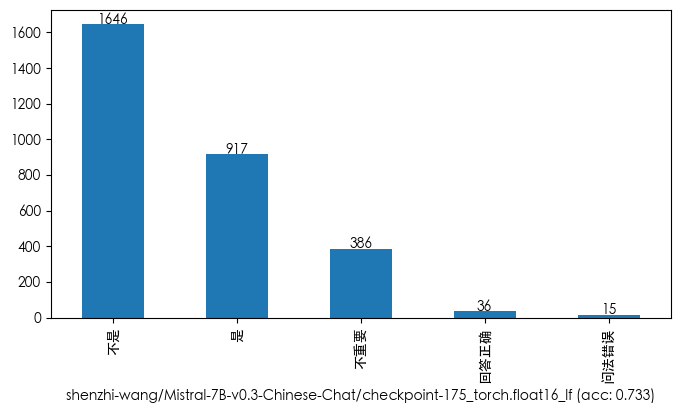

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-210_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-210_torch.float16_lf
不是      1374
是       1017
不重要      545
回答正确      34
问法错误      30
Name: count, dtype: int64


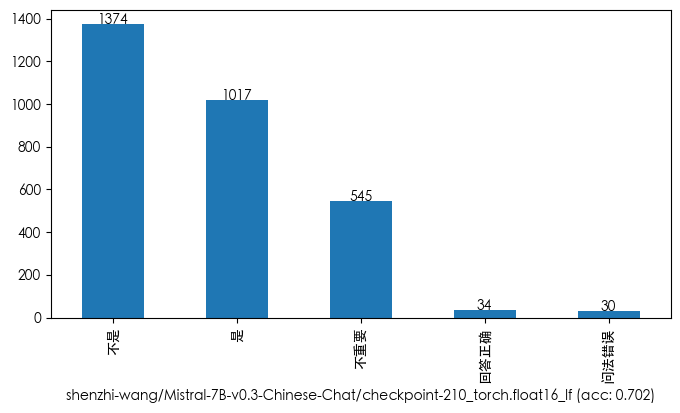

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-245_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-245_torch.float16_lf
不是      1490
是       1104
不重要      339
回答正确      34
问法错误      33
Name: count, dtype: int64


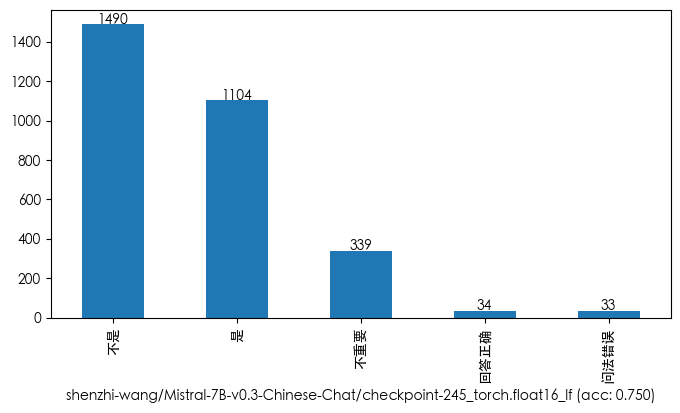

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-280_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-280_torch.float16_lf
不是      1461
是       1017
不重要      465
回答正确      29
问法错误      28
Name: count, dtype: int64


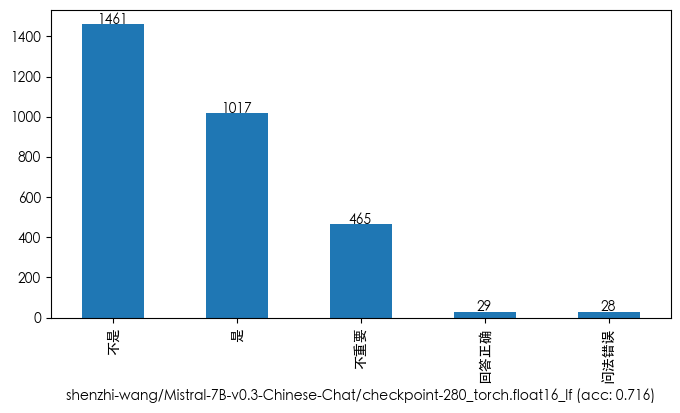

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-315_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-315_torch.float16_lf
不是      1406
是        961
不重要      569
回答正确      34
问法错误      30
Name: count, dtype: int64


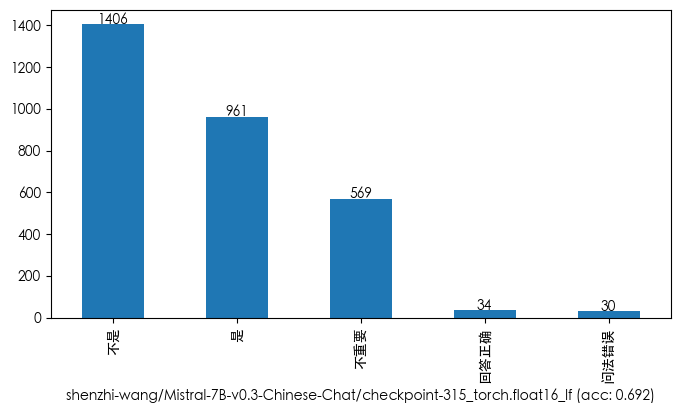

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-35_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-35_torch.float16_lf
不是      1412
是        975
不重要      558
回答正确      39
问法错误      16
Name: count, dtype: int64


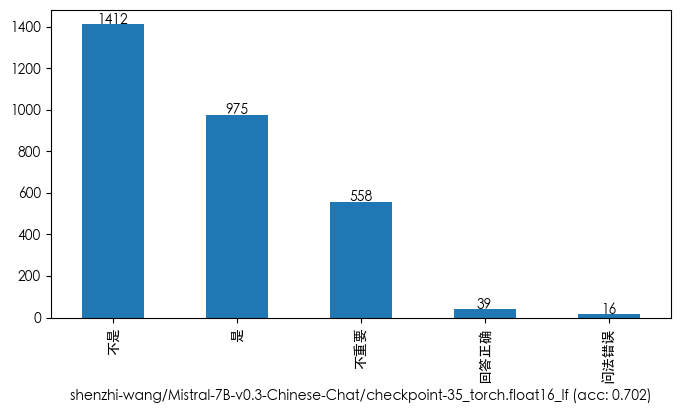

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-350_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-350_torch.float16_lf
不是      1398
是        980
不重要      556
回答正确      35
问法错误      31
Name: count, dtype: int64


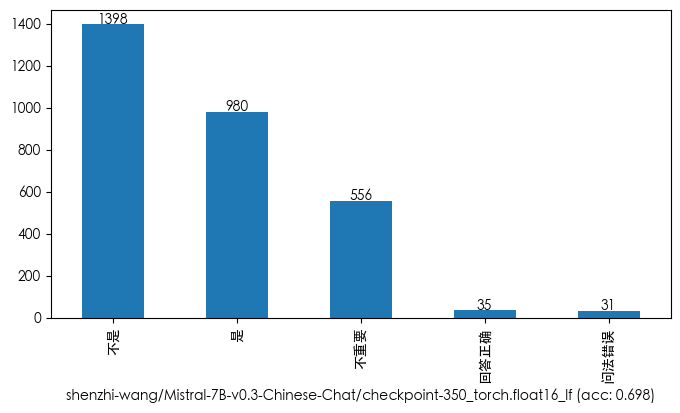

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70_torch.float16_lf
不是      1555
是       1065
不重要      351
回答正确      27
问法错误       2
Name: count, dtype: int64


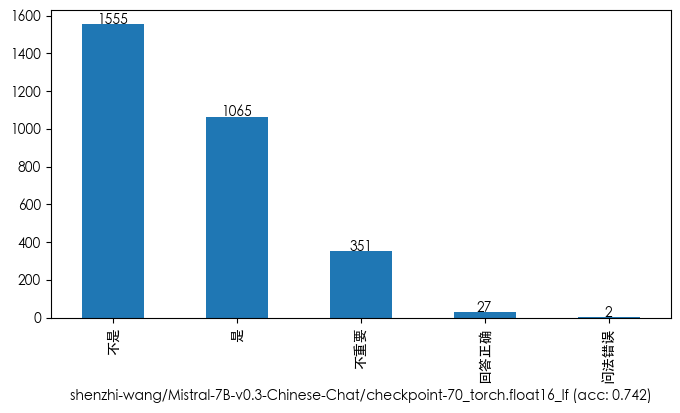

In [16]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf
不是。                                                        2204
是。                                                          711
不重要。                                                         43
不重要                                                          34
甄昭容希望与海龟做交易。                                                  1
不是。背包的主人是一位好奇的学生，他滑入湖中后遭遇了不幸。"它"在这里指的是湖龟，背包的主人是有意去寻找它的。       1
不是。湖龟因为被惊吓而潜入水中，并没有立即死亡。它能够生存在水中，直到找到了安全的地方或者被其他因素影响。         1
不是。背包的主人是为了带走他发现的湖龟，但由于湖龟是一只保护动物，他无法私自将其带回去。                  1
甄郝是中毒而亡。                                                      1
帽子是小男孩带来的，他从城市回到村子时，带着爷爷的帽子回到了湖边。                             1
小男孩是村子里的一个居民，他与爷爷在湖边生活，后来随父母去城市生活，但每年夏天都会回到村子。                1
是                                                             1
Name: count, dtype: int64


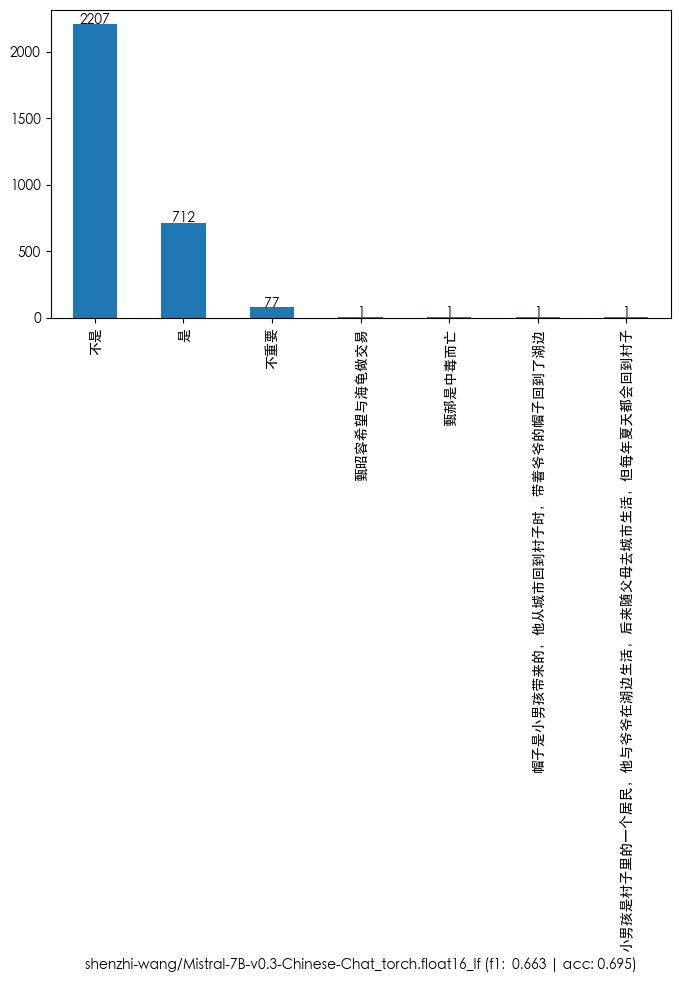

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:595: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


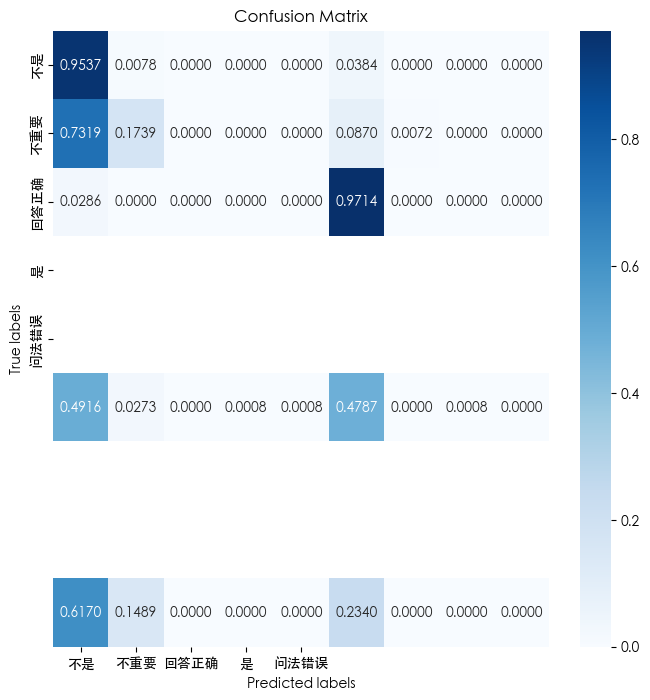

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-105_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-105_torch.float16_lf
不是      1177
是       1034
不重要      734
回答正确      36
问法错误      19
Name: count, dtype: int64


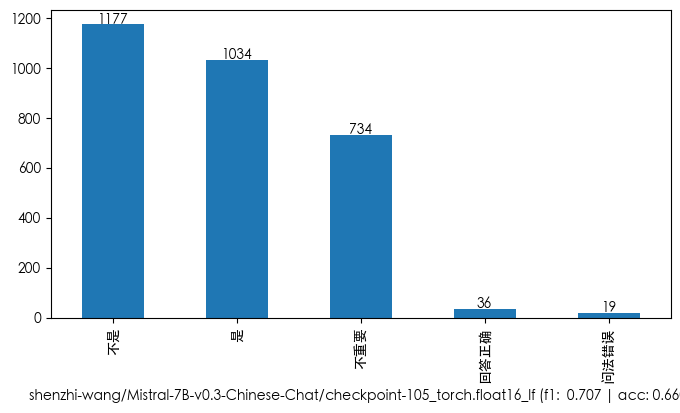

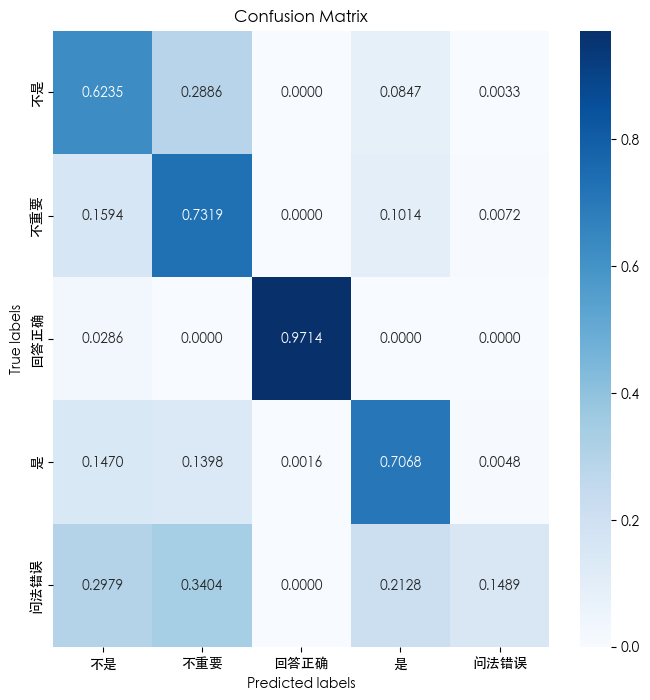

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-140_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-140_torch.float16_lf
不是      1483
是        975
不重要      459
问法错误      42
回答正确      41
Name: count, dtype: int64


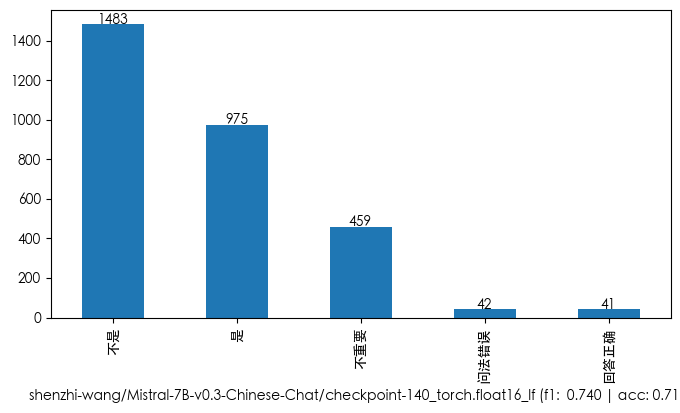

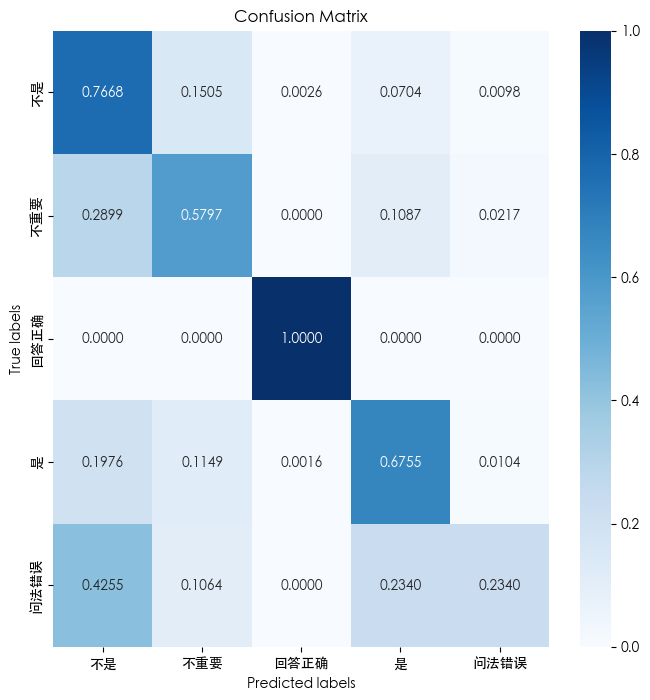

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-175_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-175_torch.float16_lf
不是      1646
是        917
不重要      386
回答正确      36
问法错误      15
Name: count, dtype: int64


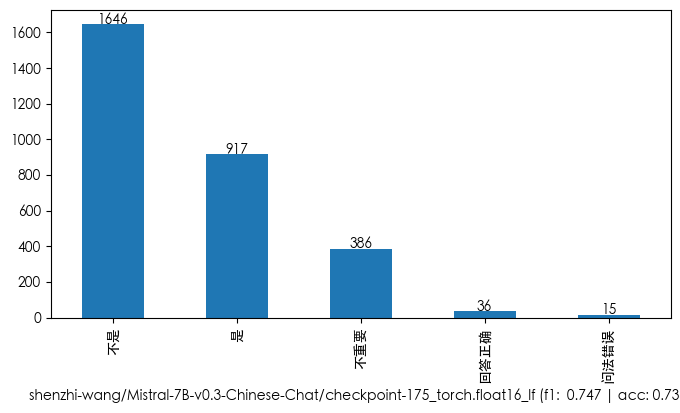

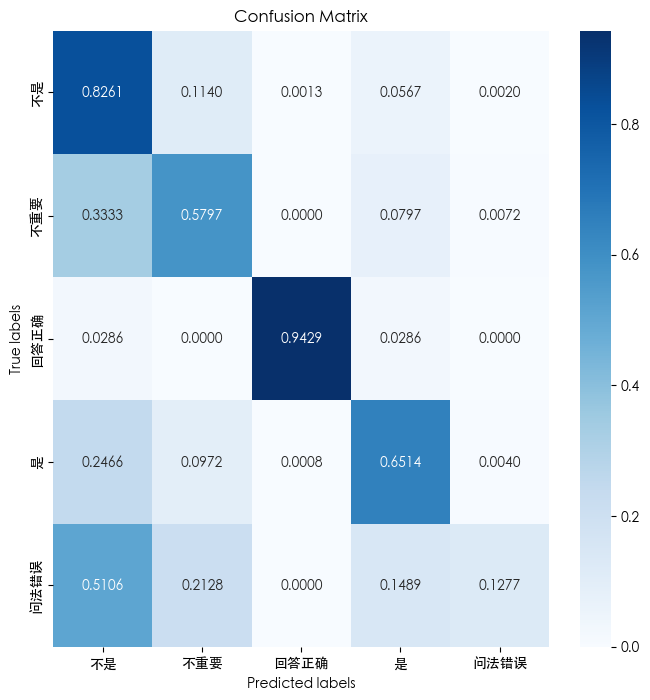

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-210_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-210_torch.float16_lf
不是      1374
是       1017
不重要      545
回答正确      34
问法错误      30
Name: count, dtype: int64


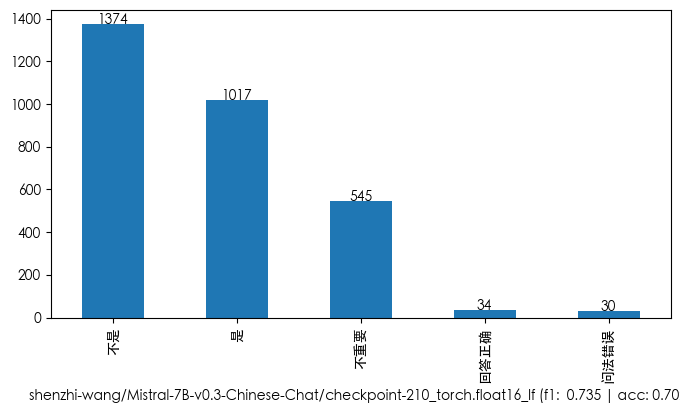

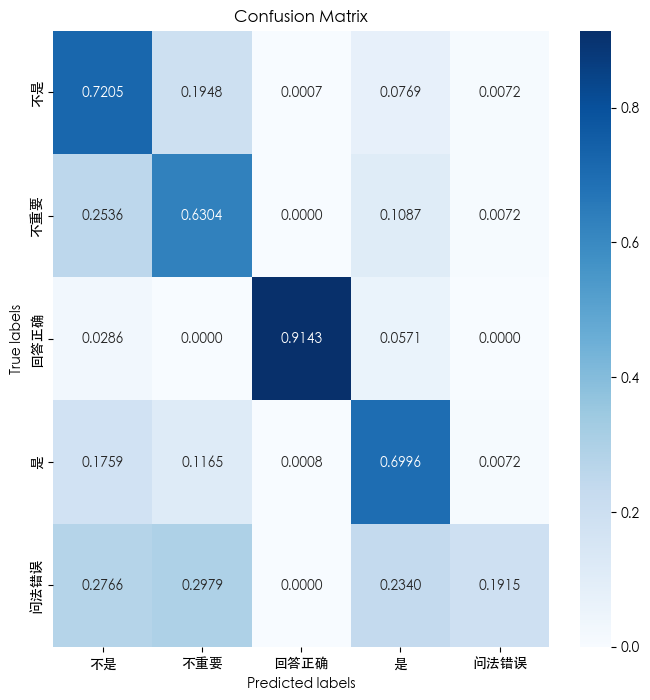

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-245_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-245_torch.float16_lf
不是      1490
是       1104
不重要      339
回答正确      34
问法错误      33
Name: count, dtype: int64


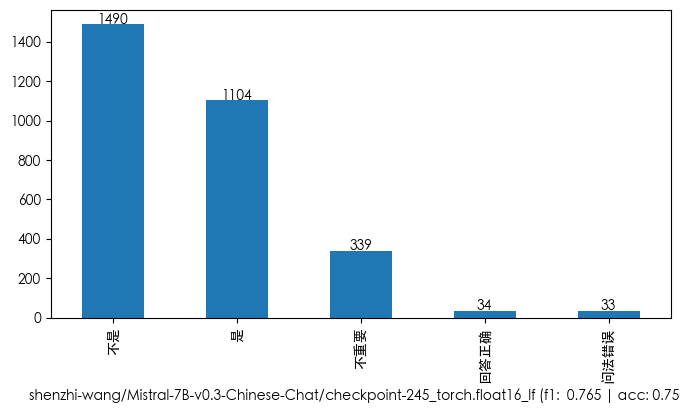

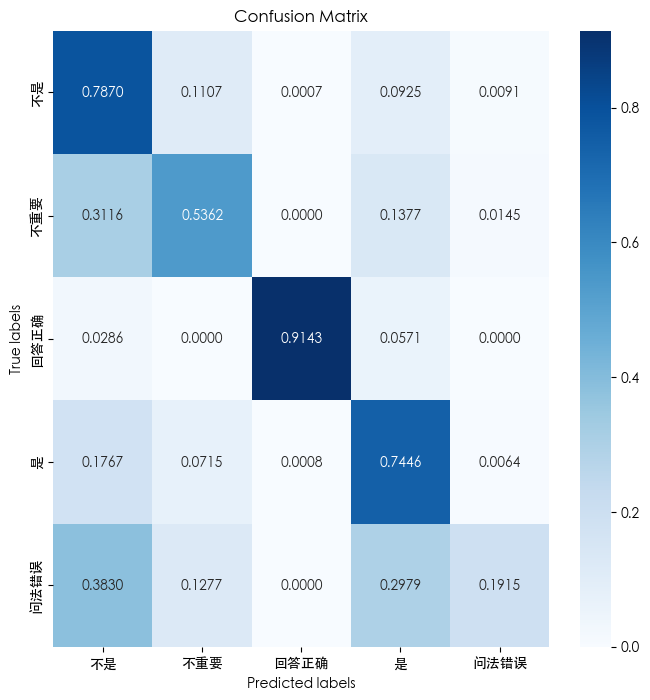

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-280_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-280_torch.float16_lf
不是      1461
是       1017
不重要      465
回答正确      29
问法错误      28
Name: count, dtype: int64


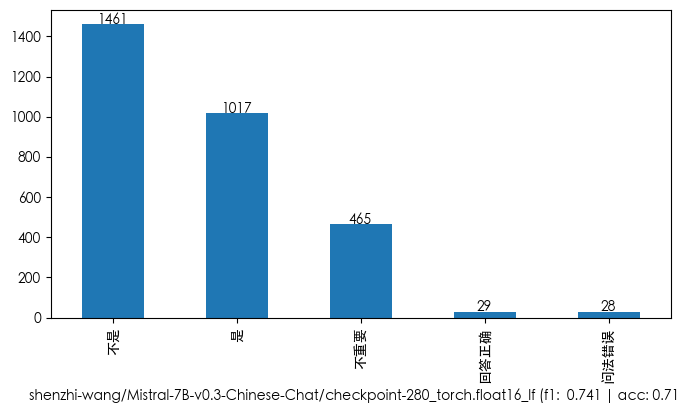

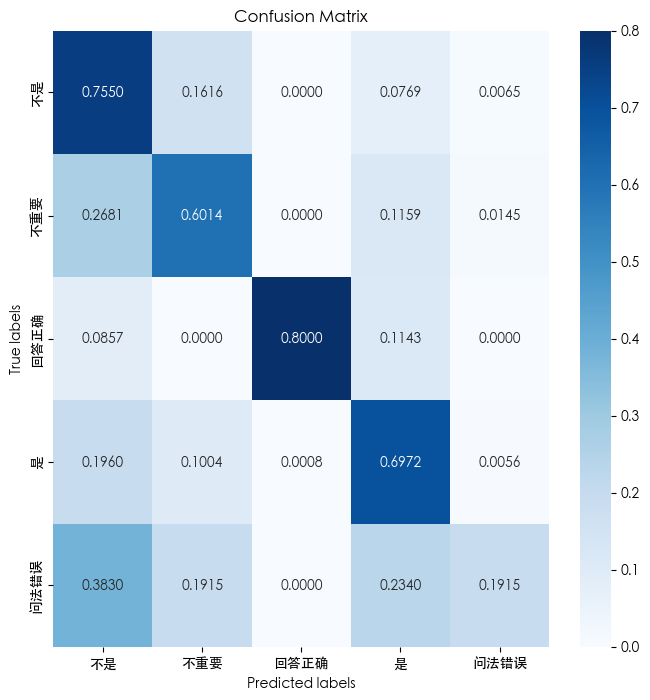

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-315_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-315_torch.float16_lf
不是      1406
是        961
不重要      569
回答正确      34
问法错误      30
Name: count, dtype: int64


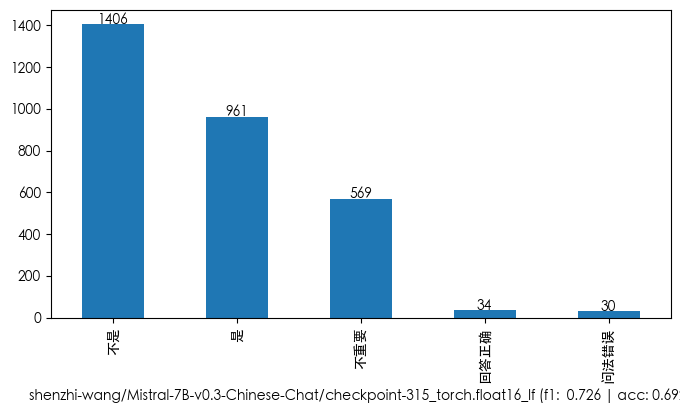

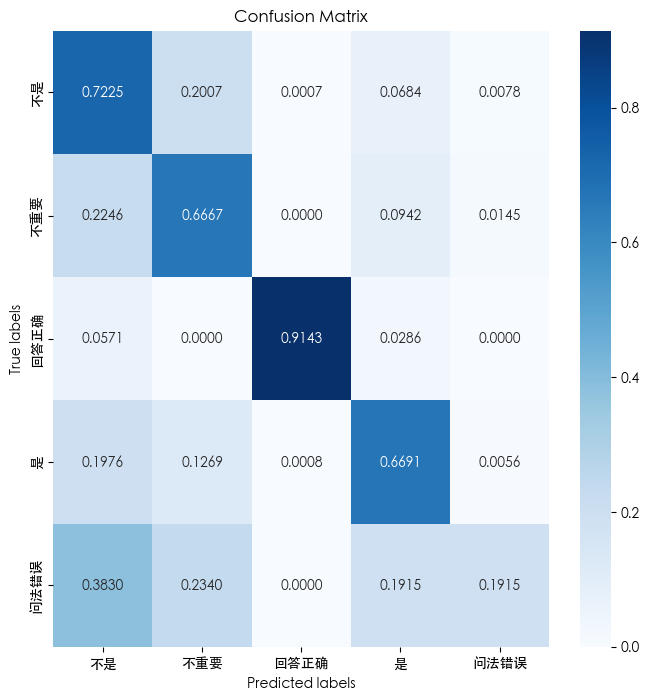

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-35_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-35_torch.float16_lf
不是      1412
是        975
不重要      558
回答正确      39
问法错误      16
Name: count, dtype: int64


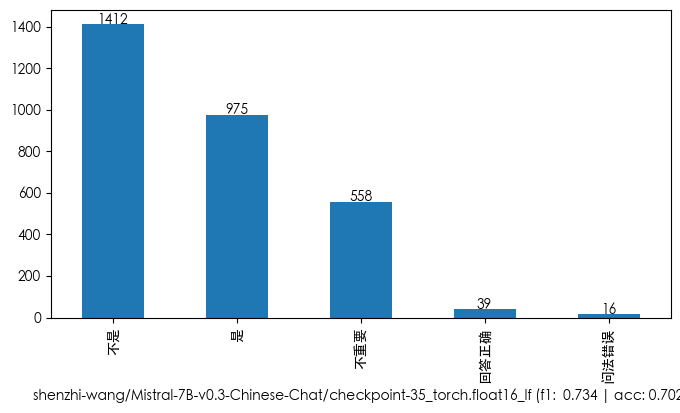

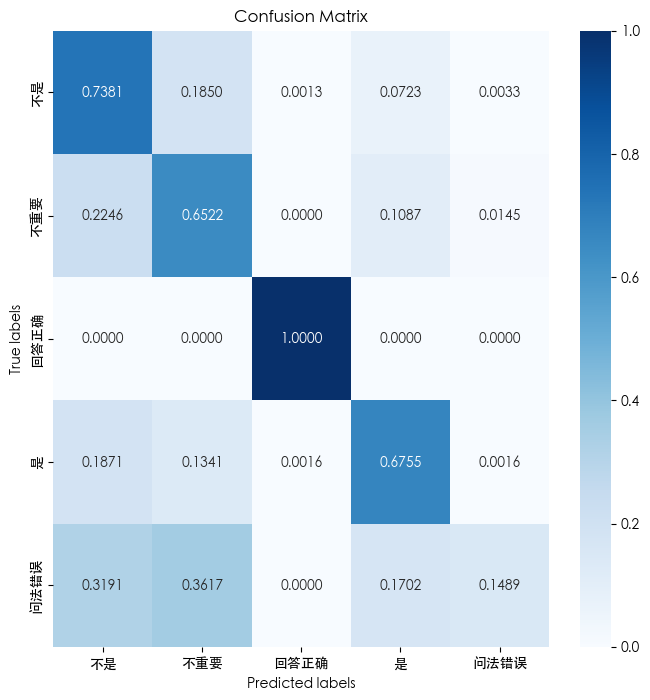

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-350_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-350_torch.float16_lf
不是      1398
是        980
不重要      556
回答正确      35
问法错误      31
Name: count, dtype: int64


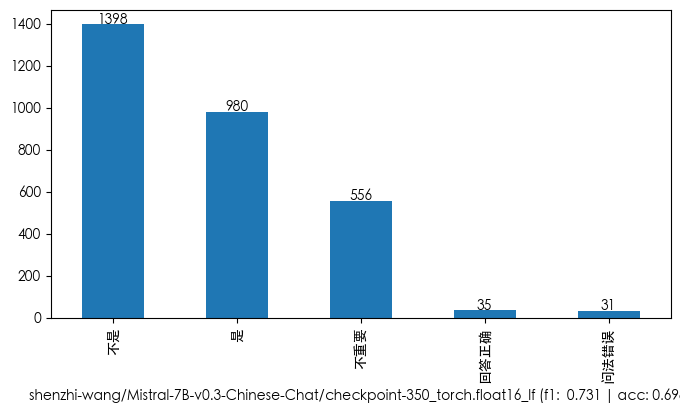

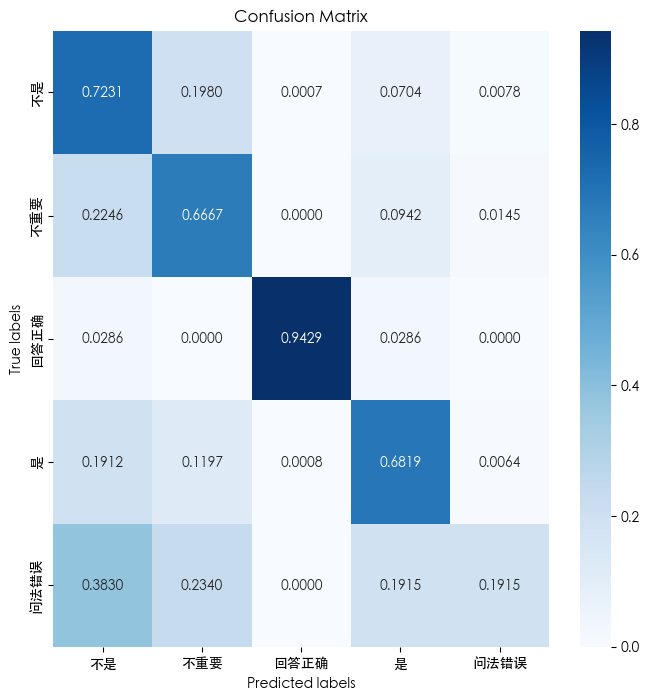

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70_torch.float16_lf
不是      1555
是       1065
不重要      351
回答正确      27
问法错误       2
Name: count, dtype: int64


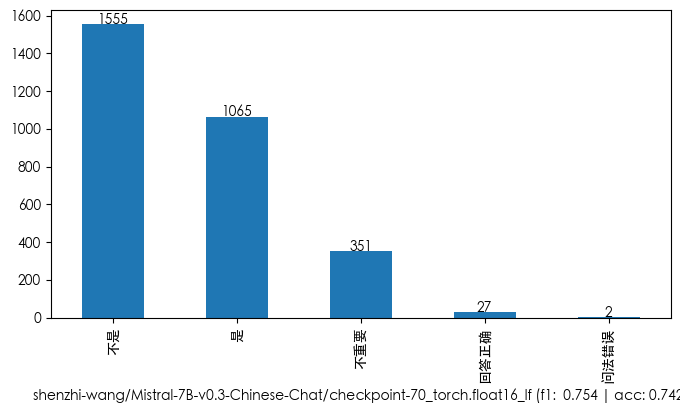

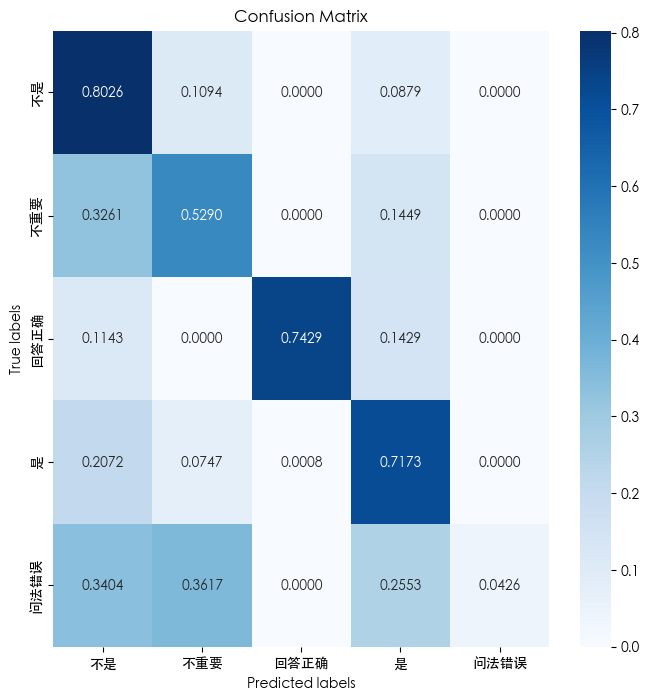

In [17]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat_torch.float16_lf
不是。                                                        2204
是。                                                          711
不重要。                                                         43
不重要                                                          34
甄昭容希望与海龟做交易。                                                  1
不是。背包的主人是一位好奇的学生，他滑入湖中后遭遇了不幸。"它"在这里指的是湖龟，背包的主人是有意去寻找它的。       1
不是。湖龟因为被惊吓而潜入水中，并没有立即死亡。它能够生存在水中，直到找到了安全的地方或者被其他因素影响。         1
不是。背包的主人是为了带走他发现的湖龟，但由于湖龟是一只保护动物，他无法私自将其带回去。                  1
甄郝是中毒而亡。                                                      1
帽子是小男孩带来的，他从城市回到村子时，带着爷爷的帽子回到了湖边。                             1
小男孩是村子里的一个居民，他与爷爷在湖边生活，后来随父母去城市生活，但每年夏天都会回到村子。                1
是                                                             1
Name: count, dtype: int64


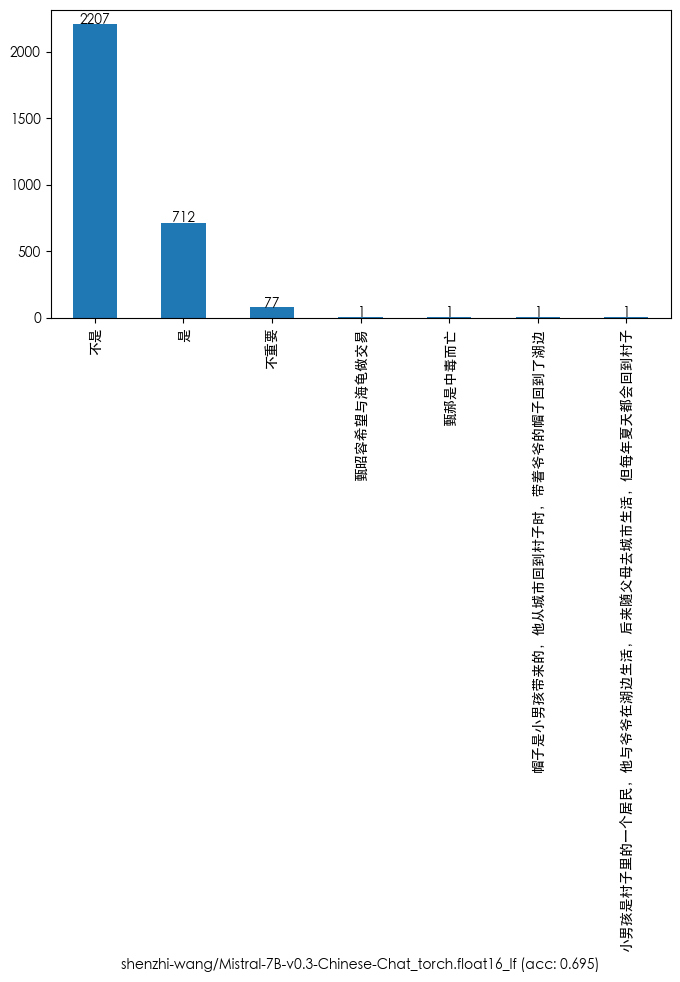

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:595: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


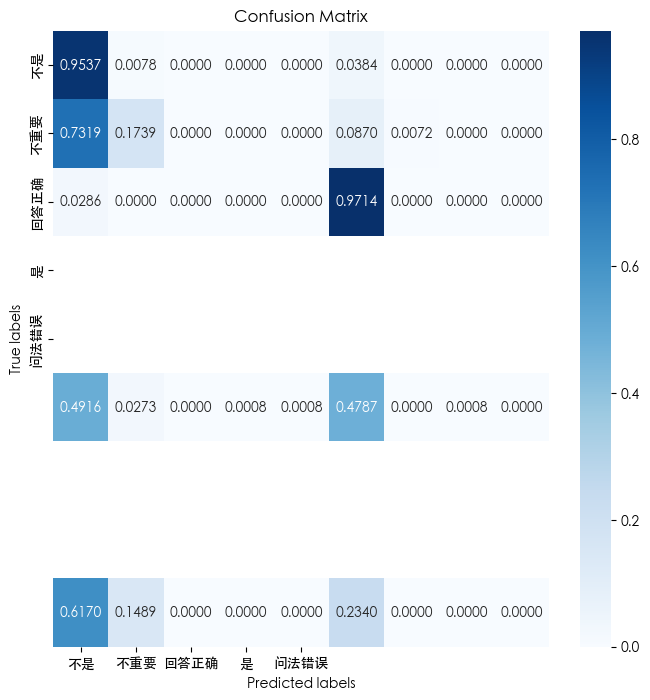

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-105_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-105_torch.float16_lf
不是      1177
是       1034
不重要      734
回答正确      36
问法错误      19
Name: count, dtype: int64


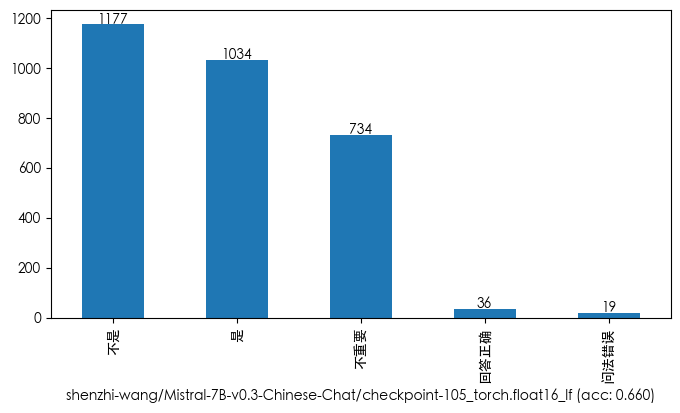

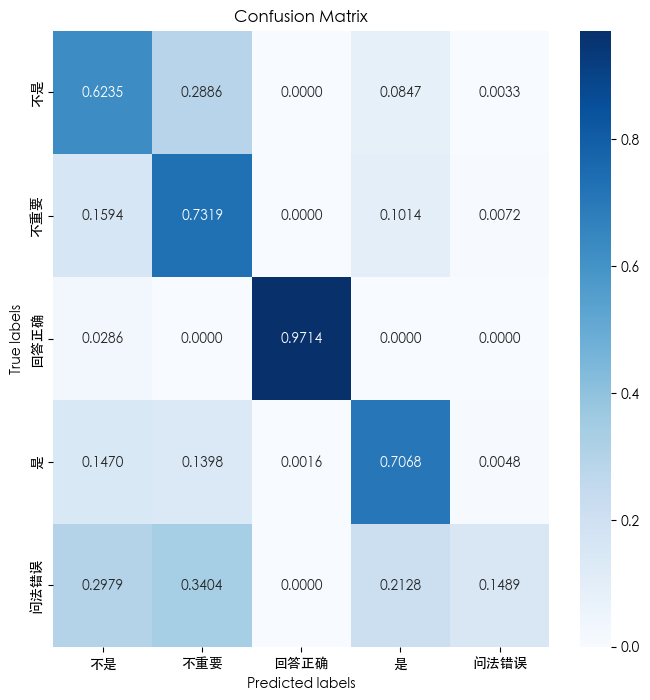

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-140_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-140_torch.float16_lf
不是      1483
是        975
不重要      459
问法错误      42
回答正确      41
Name: count, dtype: int64


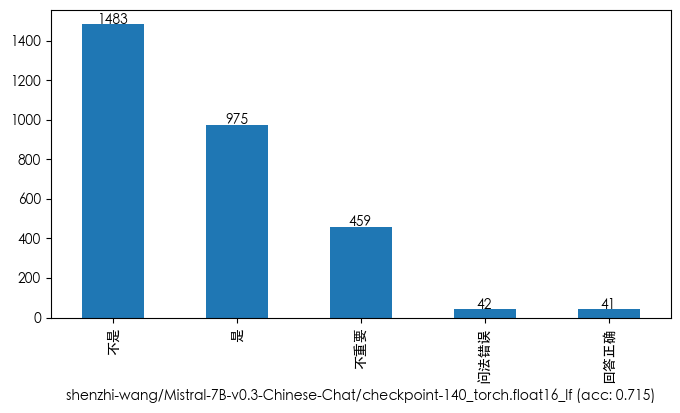

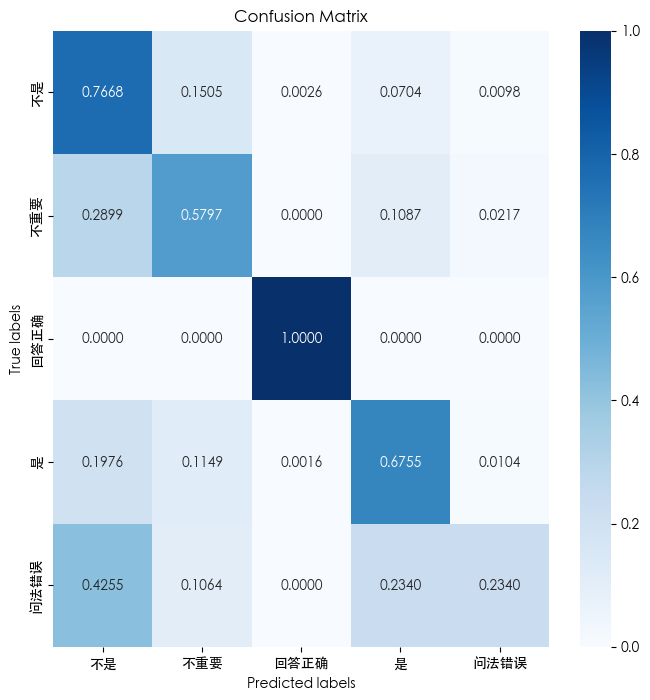

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-175_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-175_torch.float16_lf
不是      1646
是        917
不重要      386
回答正确      36
问法错误      15
Name: count, dtype: int64


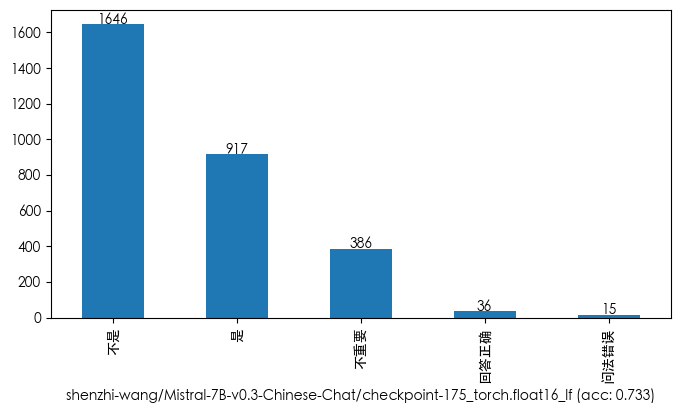

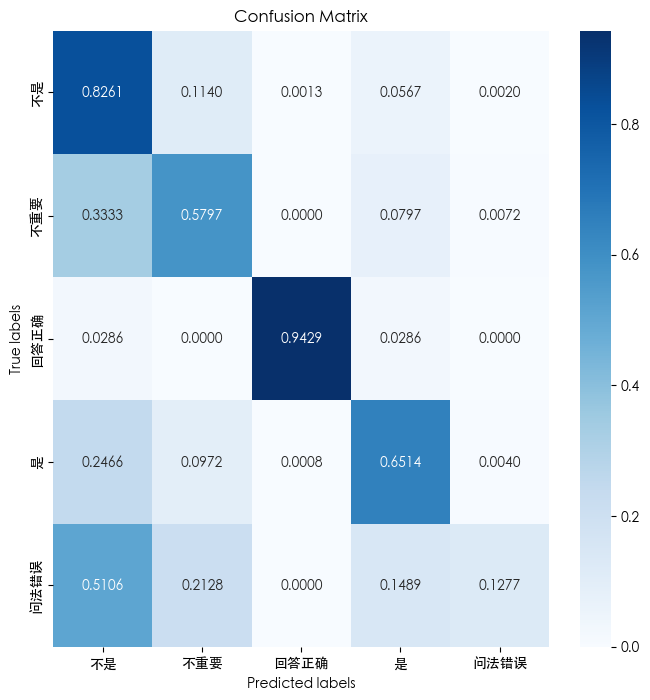

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-210_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-210_torch.float16_lf
不是      1374
是       1017
不重要      545
回答正确      34
问法错误      30
Name: count, dtype: int64


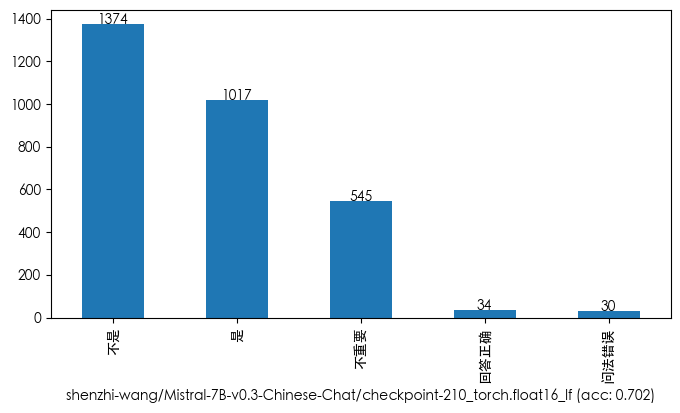

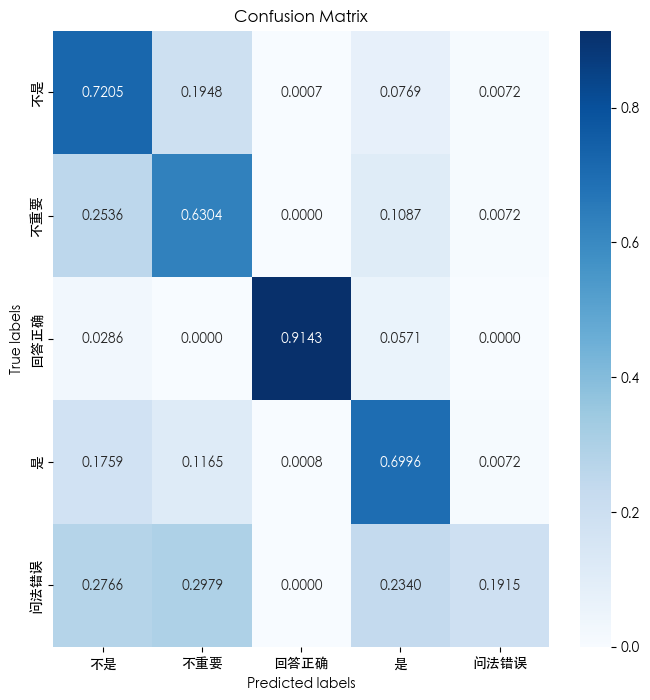

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-245_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-245_torch.float16_lf
不是      1490
是       1104
不重要      339
回答正确      34
问法错误      33
Name: count, dtype: int64


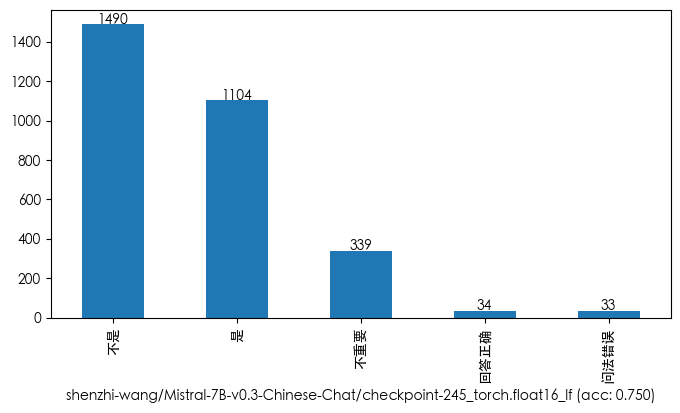

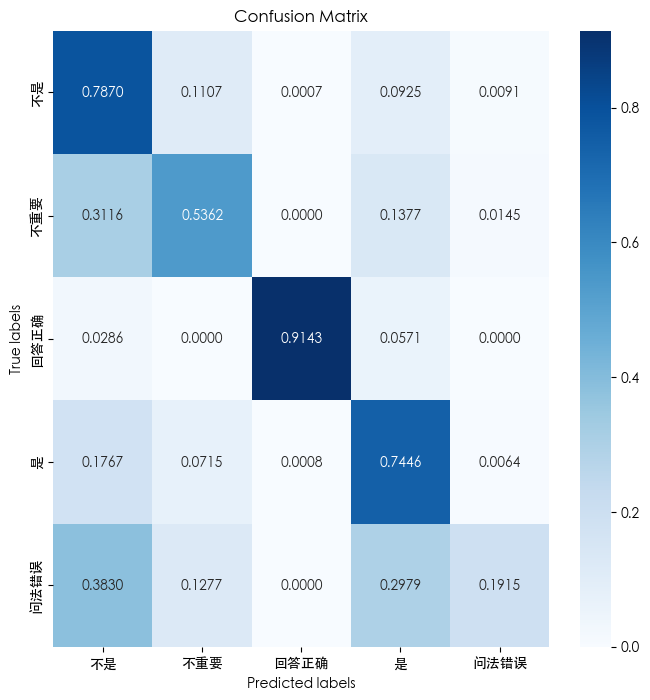

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-280_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-280_torch.float16_lf
不是      1461
是       1017
不重要      465
回答正确      29
问法错误      28
Name: count, dtype: int64


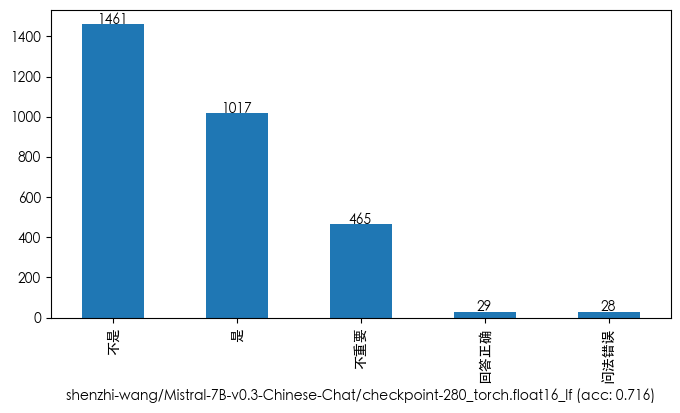

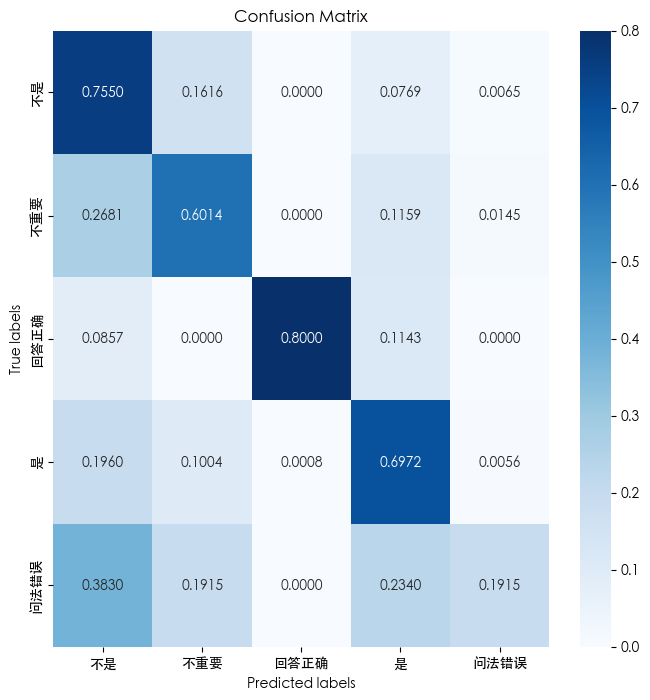

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-315_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-315_torch.float16_lf
不是      1406
是        961
不重要      569
回答正确      34
问法错误      30
Name: count, dtype: int64


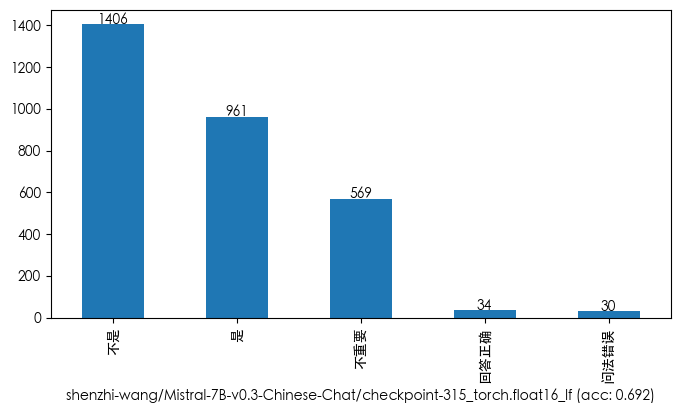

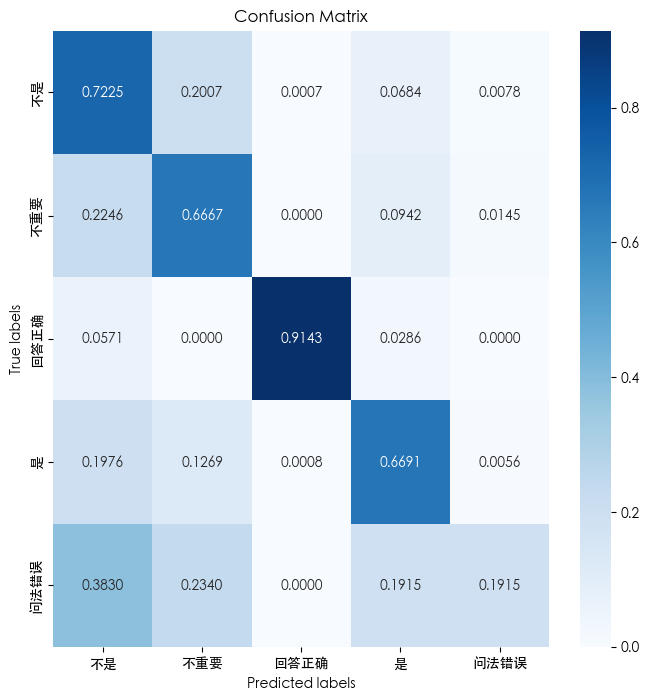

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-35_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-35_torch.float16_lf
不是      1412
是        975
不重要      558
回答正确      39
问法错误      16
Name: count, dtype: int64


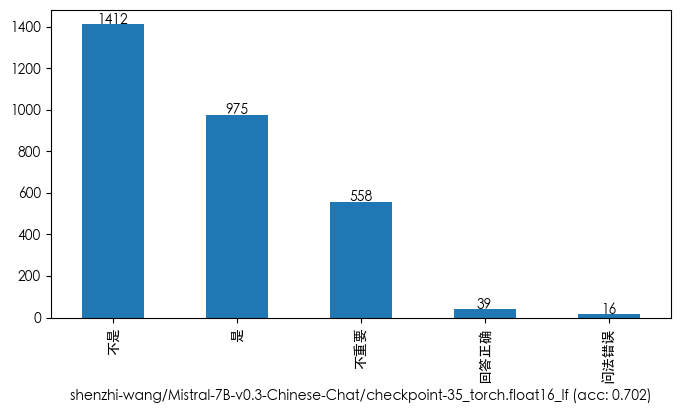

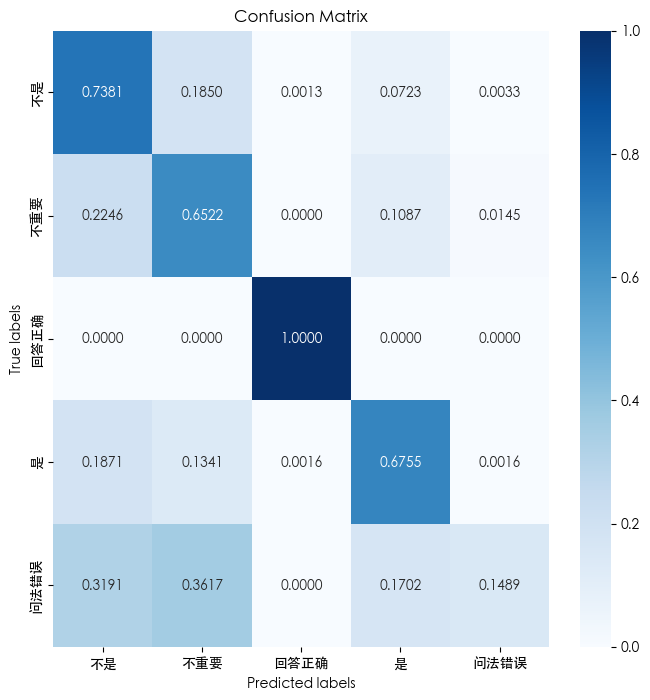

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-350_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-350_torch.float16_lf
不是      1398
是        980
不重要      556
回答正确      35
问法错误      31
Name: count, dtype: int64


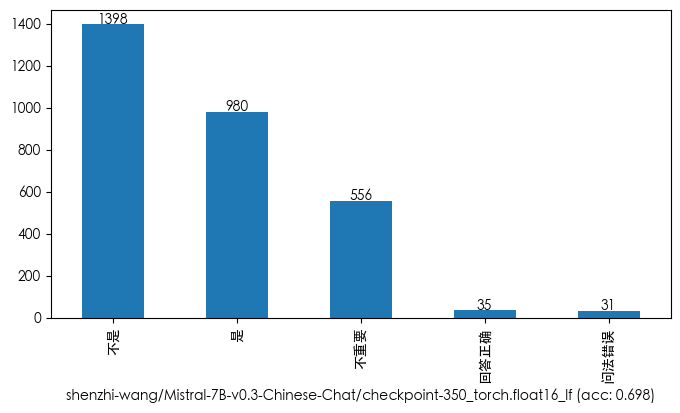

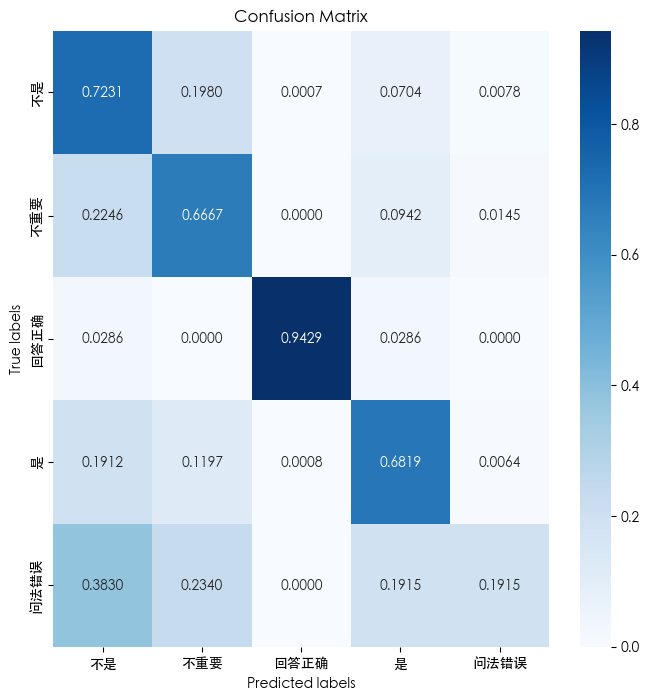

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70_torch.float16_lf **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/checkpoint-70_torch.float16_lf
不是      1555
是       1065
不重要      351
回答正确      27
问法错误       2
Name: count, dtype: int64


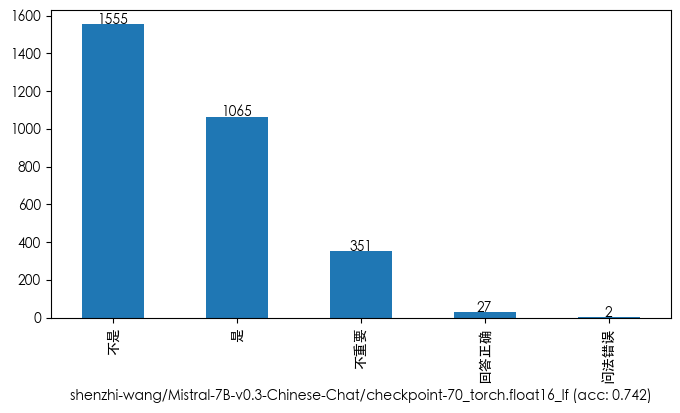

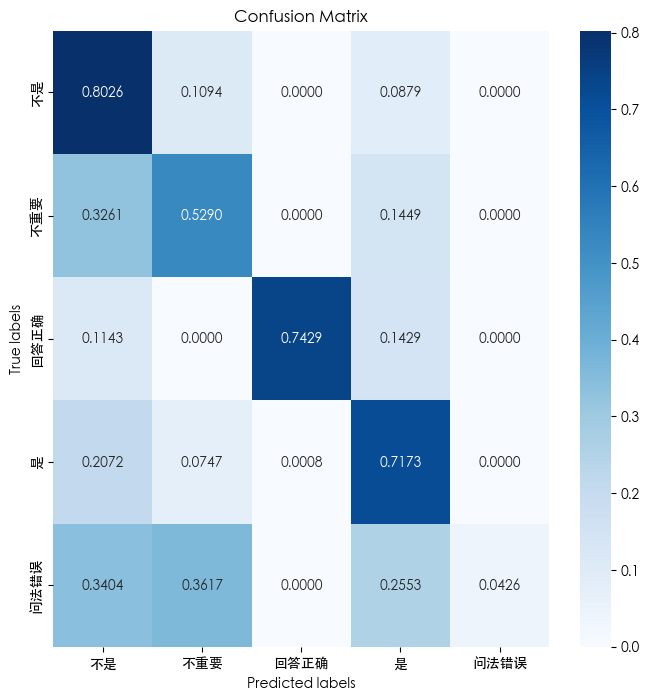

In [18]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df, col, title=f"{col} (acc: {accuracy:.3f})", preprocess_func=extract_answer
    )

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-00 **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-00
不是。                                                        2204
是。                                                          711
不重要。                                                         43
不重要                                                          34
甄昭容希望与海龟做交易。                                                  1
不是。背包的主人是一位好奇的学生，他滑入湖中后遭遇了不幸。"它"在这里指的是湖龟，背包的主人是有意去寻找它的。       1
不是。湖龟因为被惊吓而潜入水中，并没有立即死亡。它能够生存在水中，直到找到了安全的地方或者被其他因素影响。         1
不是。背包的主人是为了带走他发现的湖龟，但由于湖龟是一只保护动物，他无法私自将其带回去。                  1
甄郝是中毒而亡。                                                      1
帽子是小男孩带来的，他从城市回到村子时，带着爷爷的帽子回到了湖边。                             1
小男孩是村子里的一个居民，他与爷爷在湖边生活，后来随父母去城市生活，但每年夏天都会回到村子。                1
是                                                             1
Name: count, dtype: int64


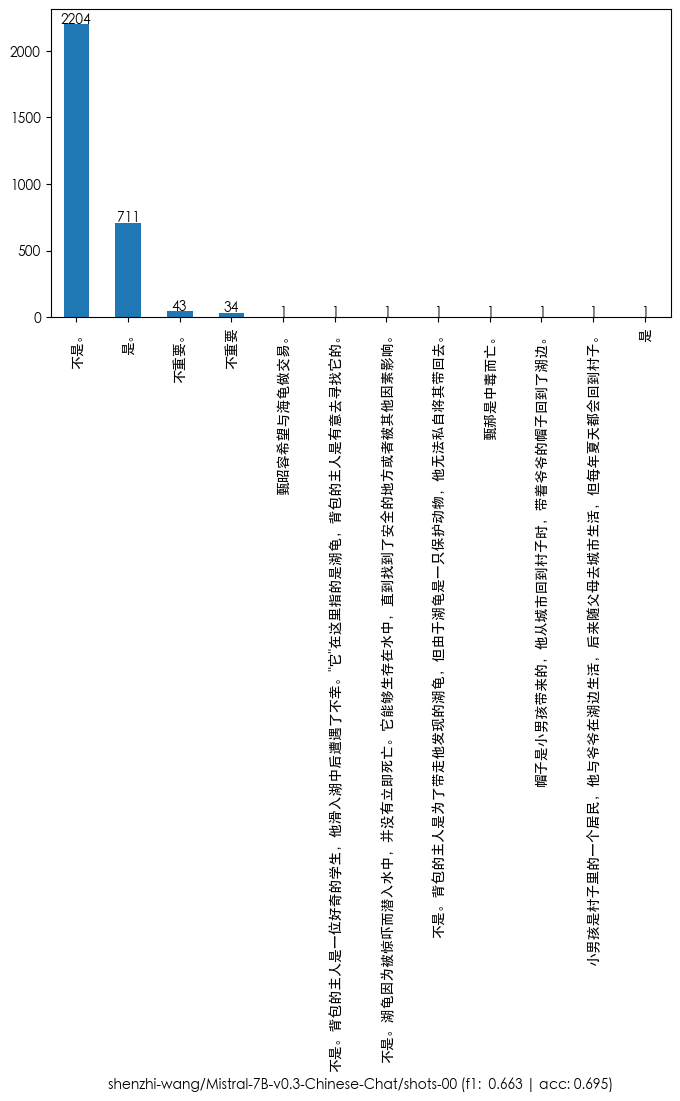

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-10 **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-10
不是。                                                                                                                                             1304
是。                                                                                                                                               886
不重要。                                                                                                                                             452
不重要                                                                                                                                              277
问法错误                                                                                                                                              22
回答正确                                                                                                                               

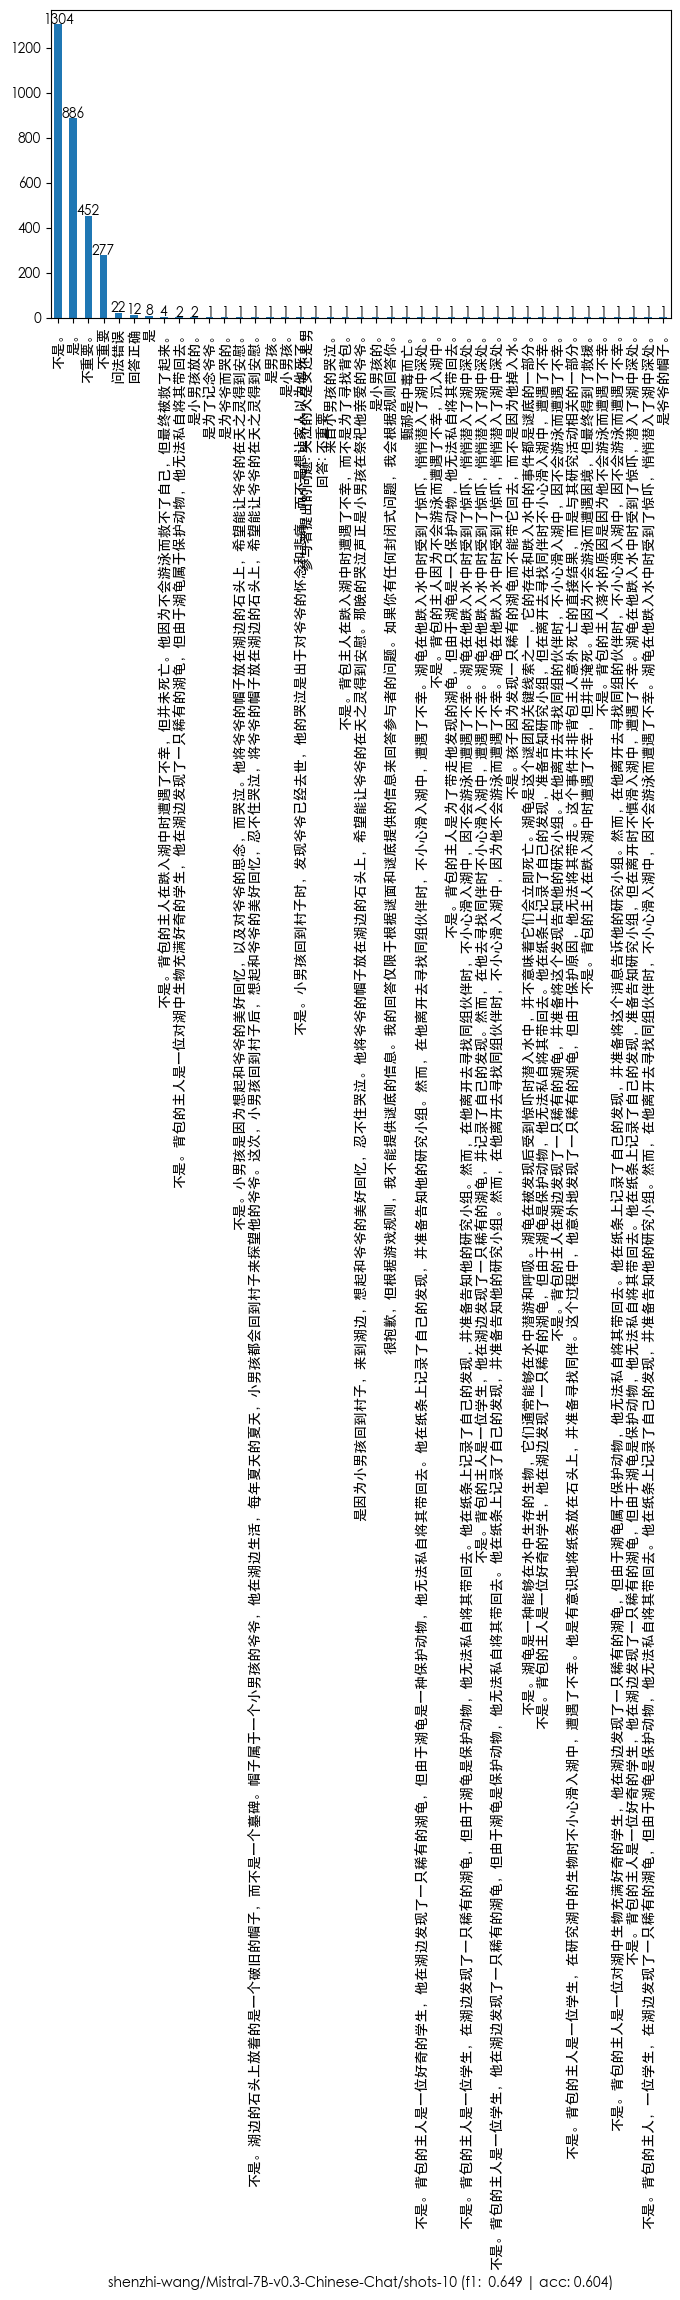

In [19]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
    )

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-00 **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-00
不是。                                                        2204
是。                                                          711
不重要。                                                         43
不重要                                                          34
甄昭容希望与海龟做交易。                                                  1
不是。背包的主人是一位好奇的学生，他滑入湖中后遭遇了不幸。"它"在这里指的是湖龟，背包的主人是有意去寻找它的。       1
不是。湖龟因为被惊吓而潜入水中，并没有立即死亡。它能够生存在水中，直到找到了安全的地方或者被其他因素影响。         1
不是。背包的主人是为了带走他发现的湖龟，但由于湖龟是一只保护动物，他无法私自将其带回去。                  1
甄郝是中毒而亡。                                                      1
帽子是小男孩带来的，他从城市回到村子时，带着爷爷的帽子回到了湖边。                             1
小男孩是村子里的一个居民，他与爷爷在湖边生活，后来随父母去城市生活，但每年夏天都会回到村子。                1
是                                                             1
Name: count, dtype: int64


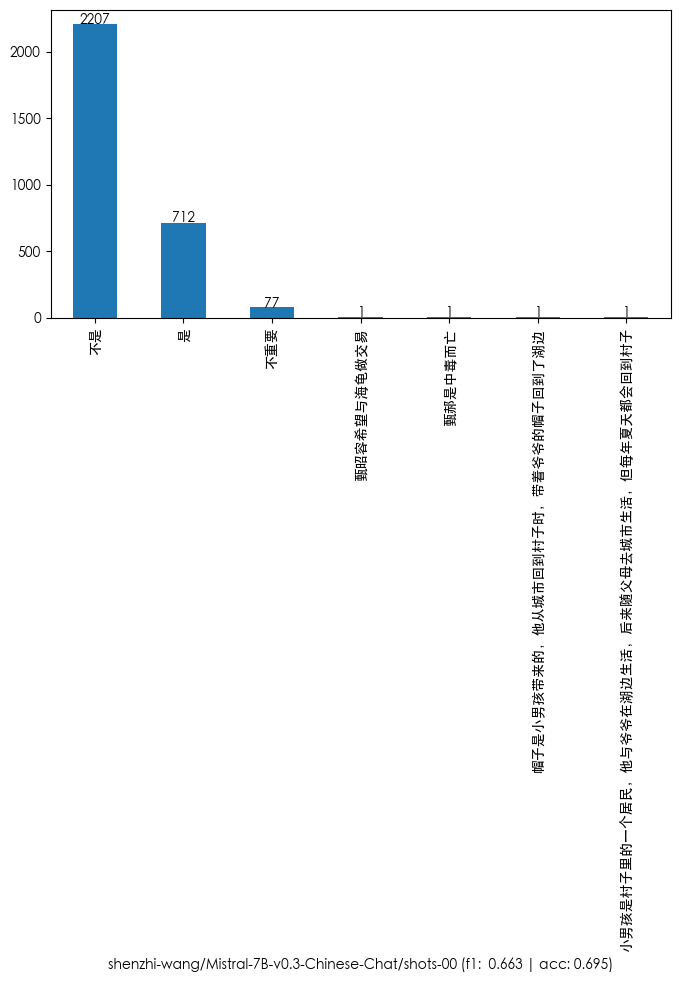

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:595: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


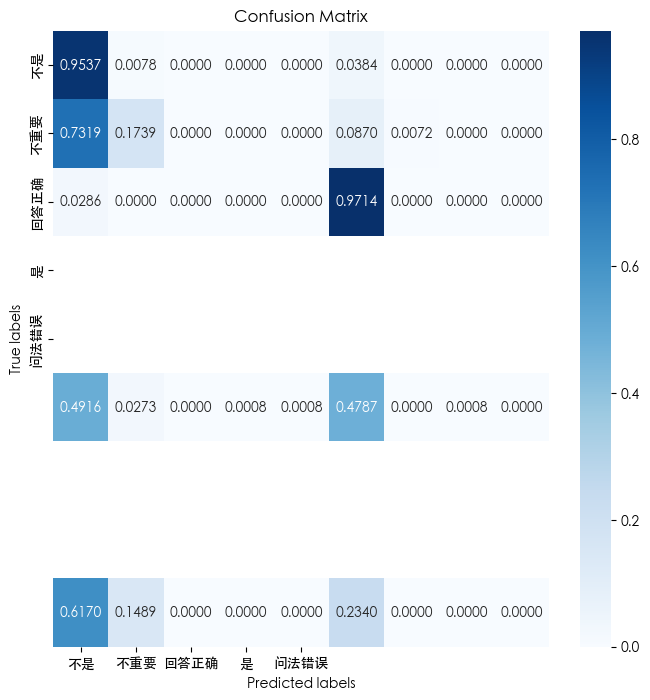

********** shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-10 **********
shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/shots-10
不是。                                                                                                                                             1304
是。                                                                                                                                               886
不重要。                                                                                                                                             452
不重要                                                                                                                                              277
问法错误                                                                                                                                              22
回答正确                                                                                                                               

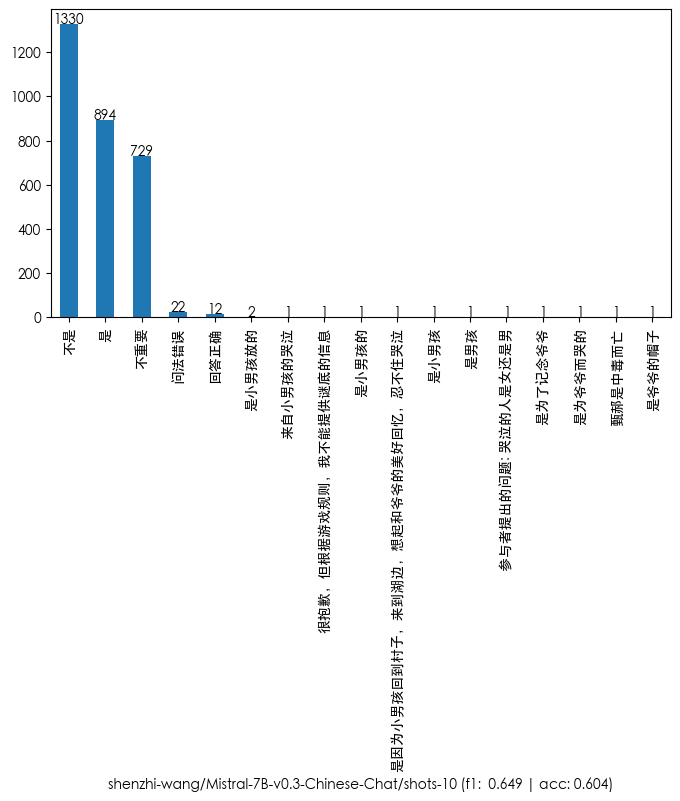

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:595: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


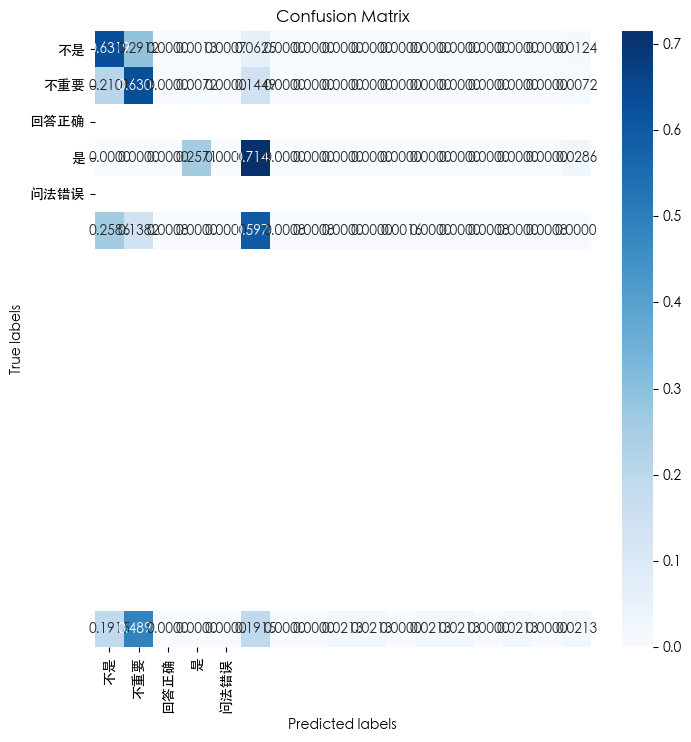

In [20]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )